In [18]:
!pip install netCDF4

DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/ml_collections-0.1.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/immutabledict-3.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/docker-6.1.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/dm_haiku-0.0.10-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/pytho

In [15]:
!pip install numpy

DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/ml_collections-0.1.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/immutabledict-3.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/docker-6.1.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/dm_haiku-0.0.10-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/pytho

In [32]:
!pip install matplotlib

DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/ml_collections-0.1.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/immutabledict-3.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/docker-6.1.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/python3.11/site-packages/dm_haiku-0.0.10-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/couttsj/anaconda3/lib/pytho

In [19]:
import netCDF4
import numpy as np

In [33]:
cdf_file = netCDF4.Dataset('AB220926_73.cdf', 'r')

In [34]:
print("Variables in the CDF file:", list(cdf_file.variables.keys()))

Variables in the CDF file: ['error_log', 'a_d_sampling_rate', 'a_d_coaddition_factor', 'scan_acquisition_time', 'scan_duration', 'inter_scan_time', 'resolution', 'actual_scan_number', 'total_intensity', 'mass_range_min', 'mass_range_max', 'time_range_min', 'time_range_max', 'scan_index', 'point_count', 'flag_count', 'mass_values', 'time_values', 'intensity_values', 'instrument_name', 'instrument_id', 'instrument_mfr', 'instrument_model', 'instrument_serial_no', 'instrument_sw_version', 'instrument_fw_version', 'instrument_os_version', 'instrument_app_version', 'instrument_comments']


In [ ]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

def read_gcms_cdf(file_path):
    cdf_file = netCDF4.Dataset(file_path, 'r')
    scan_acquisition_time = cdf_file.variables['scan_acquisition_time'][:]
    mass_values = cdf_file.variables['mass_values'][:]
    total_intensity = cdf_file.variables['total_intensity'][:]
    scan_index = cdf_file.variables['scan_index'][:]
    cdf_file.close()
    return scan_acquisition_time, mass_values, total_intensity, scan_index

def adjust_indices(scan_index, array_size):
    # Ensure scan indices do not exceed the size of the array
    valid_indices = scan_index[scan_index < array_size]
    return valid_indices

def convert_scan_index_to_time(scan_acquisition_time, scan_index):
    # Cumulative sum of scan acquisition times to get the time for each scan index
    scan_times = np.cumsum(scan_acquisition_time[scan_index])
    return scan_times

def compute_tic(scan_index, total_intensity):
    tic = []
    num_scans = len(scan_index)
    
    for i in range(num_scans - 1):
        start_idx = scan_index[i]
        end_idx = scan_index[i + 1]
        tic.append(np.sum(total_intensity[start_idx:end_idx]))
    
    # Handle the last scan
    start_idx = scan_index[-1]
    tic.append(np.sum(intensity_values[start_idx:]))
    
    return np.array(tic)

def plot_tic(scan_times, tic):
    plt.figure(figsize=(10, 5))
    plt.plot(scan_times, tic)
    plt.title('Total Ion Chromatogram (TIC)')
    plt.xlabel('Time')
    plt.ylabel('Total Intensity')
    plt.show()

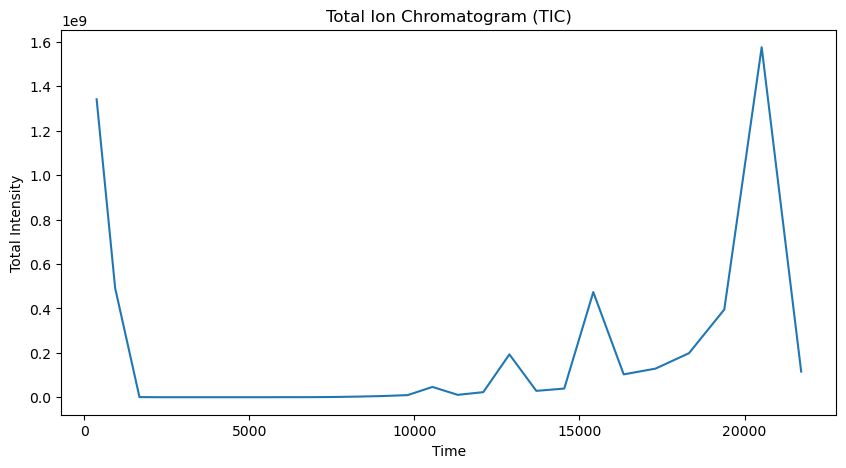

In [71]:

# Example usage
file_path = 'AB220926_37.cdf'
scan_acquisition_time, mass_values, intensity_values, scan_index = read_gcms_cdf(file_path)

# Adjust indices to prevent out-of-bounds errors
scan_index = adjust_indices(scan_index, len(scan_acquisition_time))

# Convert scan index to time
scan_times = convert_scan_index_to_time(scan_acquisition_time, scan_index)

# Compute the TIC
tic = compute_tic(scan_index, intensity_values)

# Plot the TIC
plot_tic(scan_times, tic)



In [66]:
len(scan_index)

3349

In [68]:
len(scan_acquisition_time)

3349

In [72]:
len(total_intensity)

3349

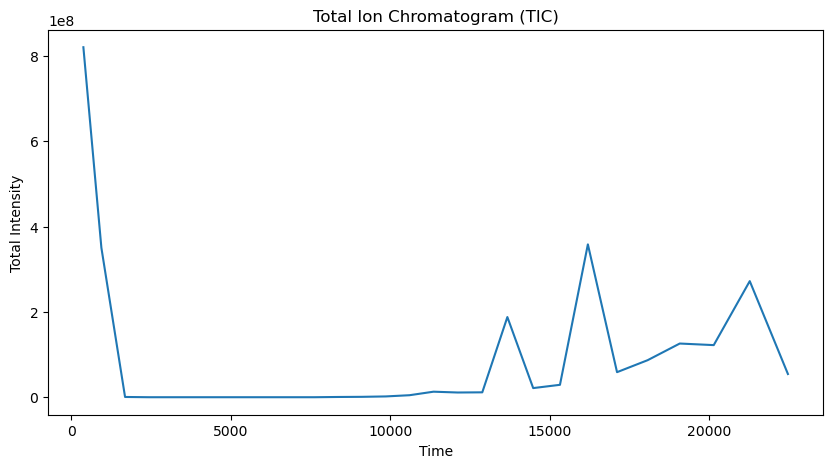

In [73]:
# Example usage
file_path = 'AB220926_73.cdf'
scan_acquisition_time, mass_values, intensity_values, scan_index = read_gcms_cdf(file_path)

# Adjust indices to prevent out-of-bounds errors
scan_index = adjust_indices(scan_index, len(scan_acquisition_time))

# Convert scan index to time
scan_times = convert_scan_index_to_time(scan_acquisition_time, scan_index)

# Compute the TIC
tic = compute_tic(scan_index, intensity_values)

# Plot the TIC
plot_tic(scan_times, tic)